In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt
import random
from IPython.display import clear_output

In [2]:
env = gym.make("Taxi-v3").env
print("Action Space {}".format(env.action_space))
print("State Space {}".format(env.observation_space))

Action Space Discrete(6)
State Space Discrete(500)


In [3]:
q_table = np.zeros([env.observation_space.n, env.action_space.n])
print(q_table)
print(q_table.shape)

[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]
(500, 6)


Episode: 2400
Training finished.

Recompensa media:  -1456.2167999999965


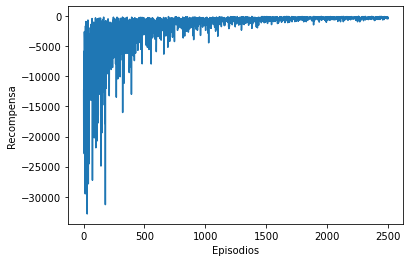

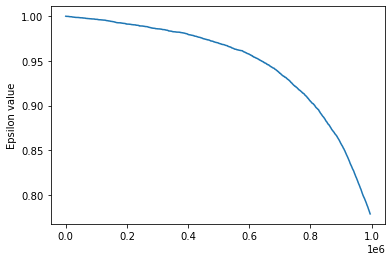

In [4]:
# Hyperparameters
alpha = 0.1
gamma = 0.6
epsilon = 1.0                 # Exploration rate
max_epsilon = 1.0             # Exploration probability at start
min_epsilon = 0.0            # Minimum exploration probability
decay_rate = 0.0001

all_epochs = []
all_penalties = []

epis = 2500
reward_media = 0

array_epsilon = []
array_reward = []
array_ep = []

for i in range(1, epis):
    state = env.reset()
    epochs, penalties, reward, = 0, 0, 0
    done = False
    reward_count = 0
    while not done:
        if random.uniform(0, 1) < epsilon:
            action = env.action_space.sample() # Explore action space
        else:
            action = np.argmax(q_table[state]) # Exploit learned values
        next_state, reward, done, info = env.step(action)
        old_value = q_table[state, action]
        next_max = np.max(q_table[next_state])
        new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max - old_value)
        q_table[state, action] = new_value
        if reward == -10:
            penalties += 1
        state = next_state
        epochs += 1

        array_epsilon.append(epsilon)
        epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*i)
        reward_count +=reward

    # print(f"Recomepnsas en episodio {i}: {reward_count}")
    reward_media += reward_count/epis
    array_reward.append(reward_count)
    array_ep.append(i)
    if i % 100 == 0:
        clear_output(wait=True)
        print(f"Episode: {i}")

print("Training finished.\n")
print("Recompensa media: ", reward_media)

plt.plot(array_ep, array_reward)
plt.ylabel('Recompensa')
plt.xlabel('Episodios')
plt.show()
plt.plot(array_epsilon)
plt.ylabel('Epsilon value')
plt.show()

In [5]:
"""Evaluate agent's performance after Q-learning"""

total_epochs, total_penalties, total_aciertos = 0, 0, 0
episodes = 100

for _ in range(episodes):
    state = env.reset()
    epochs, penalties, reward = 0, 0, 0
    acierto=0
    done = False
    while epochs<150 and reward != -10 and not done:
        action = np.argmax(q_table[state])
        state, reward, done, info = env.step(action)
        if reward == -10 or epochs == 149:
            penalties += 1
        if done:
            acierto += 1
        epochs += 1
    total_penalties += penalties
    total_epochs += epochs
    total_aciertos += acierto

print(f"Results after {episodes} episodes:")
print(f"Total errors: {total_penalties}")
print(f"Total succes: {total_aciertos}")
print(f"Average timesteps per episode: {total_epochs / episodes}")
print(f"Average penalties per episode: {total_penalties / episodes}")


Results after 100 episodes:
Total errors: 0
Total succes: 100
Average timesteps per episode: 13.29
Average penalties per episode: 0.0
